# Heart Disease Prediction (Cleveland UCI)

## 1. Problem Statement
### 1a. Context

Cardiovascular diseases, including heart disease, remain a leading cause of mortality worldwide. Early detection of heart disease risk is crucial to enable preventive care and reduce life-threatening incidents.

This project uses the Cleveland Heart Disease dataset, which contains clinical and physiological data collected from patients, to build a predictive model that can assist in identifying individuals at risk of heart disease.

---

### 1b. Problem Definition

The objective is to develop a supervised machine learning model to predict the presence of heart disease based on patient health indicators.

Specifically:
- **Input**: 13 patient features:
    - Age of the patient (`age`)
    - Sex (`sex`)
    - Type of chest pain experienced (`cp`)
    - Resting blood pressure in mm Hg (`trestbps`)
    - Serum cholesterol level in mg/dl (`chol`)
    - Fasting blood sugar > 120 mg/dl (`fbs`)
        - 1: true
        - 0: false
    - Resting electrocardiographic results (`restecg`)
        - 0: normal
        - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - Maximum heart rate achieved (`thalach`)
    - Exercise induced angina (`exang`)
        - 1: yes
        - 0: no
    - ST depression induced by exercise relative to rest (`oldpeak`)
    - Slope of the peak exercise ST segment (`slope`)
        - 0: upsloping
        - 1: flat
        - 2: downsloping
    - Number of major vessels (0–3) colored by fluoroscopy (`ca`)
    - Thalassemia status (`thal`)
        - 0: normal
        - 1: fixed defect
        - 2: reversable defect and the label

- **Output/Target**: A binary classification — 
    - `1` indicates presence of heart disease
    - `0` indicates no heart disease

## 2. Data Acquisition

In [58]:
# Essential libraries that will be used throughout the project

# System utilities (for file paths, etc.)
import os

# Kaggle resources
import kagglehub

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model training
from sklearn.linear_model import LogisticRegression

# Train/Test splitting
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Downloading the latest version of the dataset, and printing out the directory
path = kagglehub.dataset_download("cherngs/heart-disease-cleveland-uci")
print("Path to dataset files:", path)
print(os.listdir(path))

# Loading the dataset into pandas
df = pd.read_csv(os.path.join(path, 'heart_cleveland_upload.csv'))

# Checking the data
display(df)

Path to dataset files: C:\Users\leonk\.cache\kagglehub\datasets\cherngs\heart-disease-cleveland-uci\versions\1
['heart_cleveland_upload.csv']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


## 3. Data Cleaning & Preprocessing

In [25]:
# Checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [24]:
# Summary statistics for numerical features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [28]:
# Feature/target split
X = df.drop('condition', axis=1)
y = df['condition']

# Preview targets
print("Target variable distribution:")
print(y.value_counts())

Target variable distribution:
condition
0    160
1    137
Name: count, dtype: int64


In [32]:
# Feature scaling with StandardScaler (z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
display(X_scaled.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292
3,1.157555,0.691095,-2.240629,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292


## 4. Explarotary Data Analysis

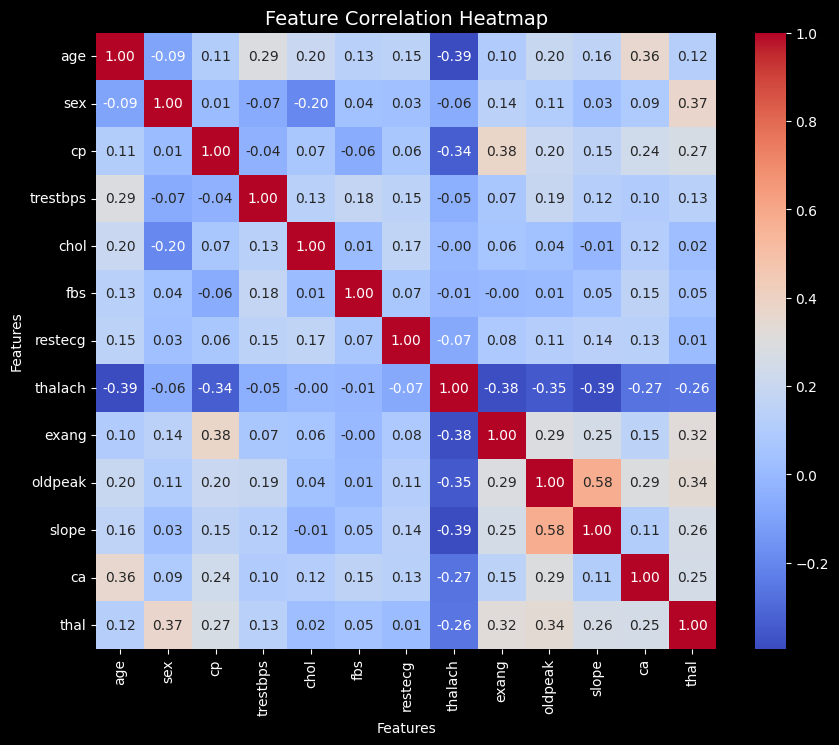

In [55]:
# Correlation Heatmap for Features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

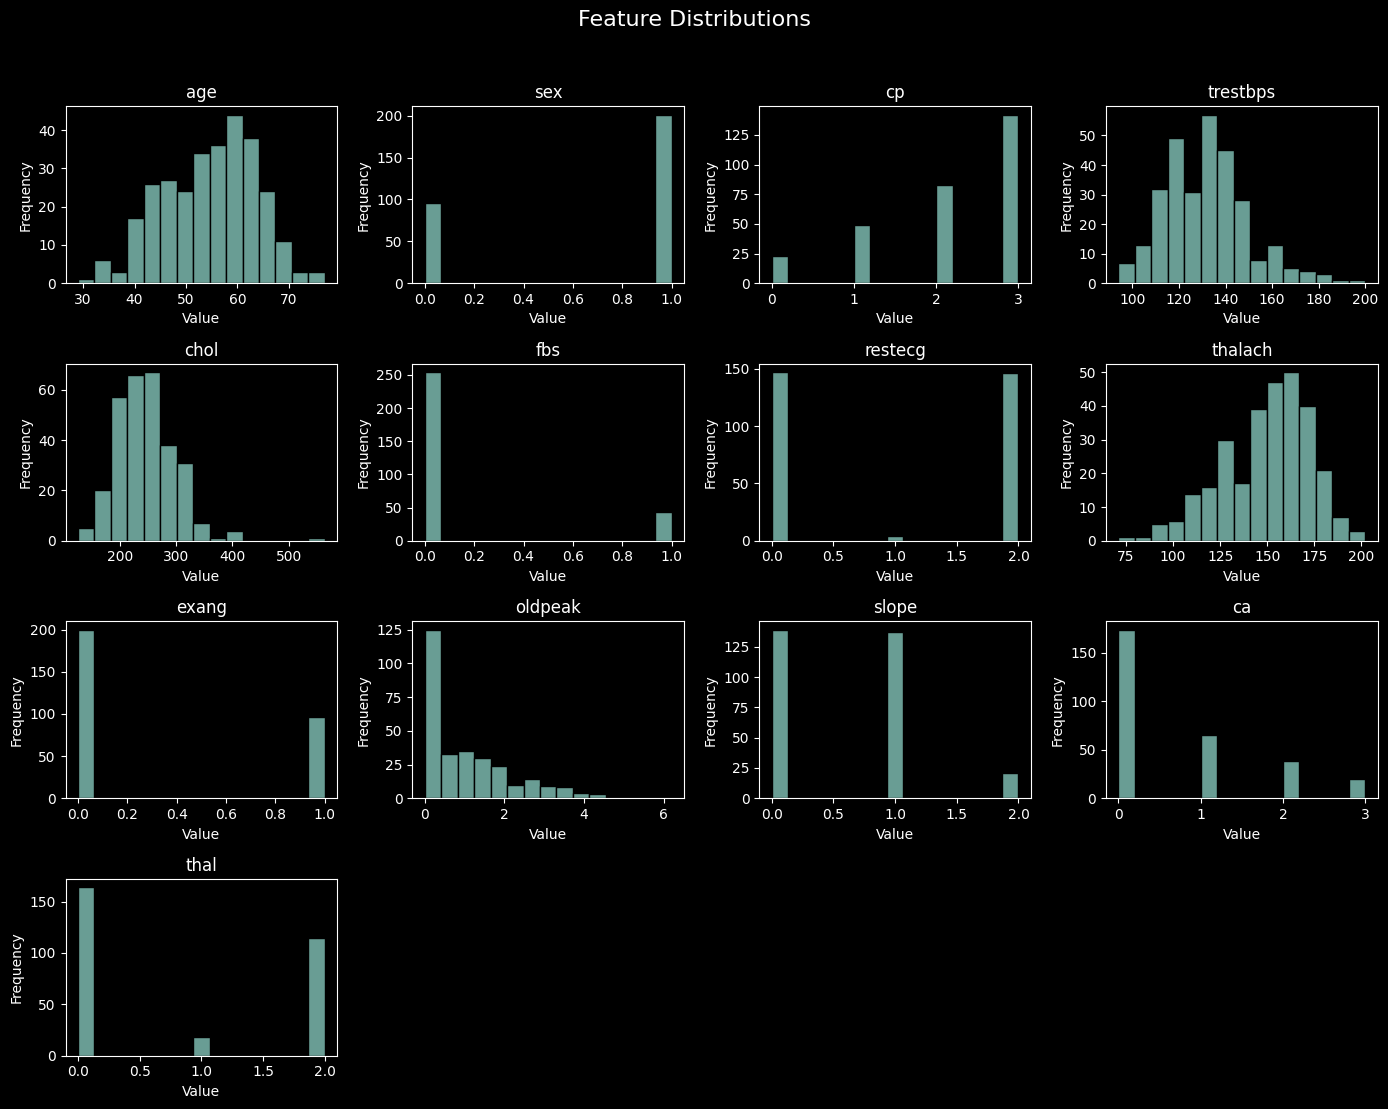

In [56]:
# Feature Distribution Histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12))
fig.suptitle("Feature Distributions", fontsize=16, y=0.92)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature histogram
for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=15, edgecolor='black', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make room for suptitle
plt.show()

## 5. Train-Test Split

In [66]:
# 80% training, 20% testing with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm split sizes and class balance
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

print("\nTraining target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))

Training set size: 237
Test set size: 60

Training target distribution:
condition
0    0.540084
1    0.459916
Name: proportion, dtype: float64

Test target distribution:
condition
0    0.533333
1    0.466667
Name: proportion, dtype: float64


## 6. Model Training

In [68]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit model to training data
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


## 7. Model Evaluation

Test Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



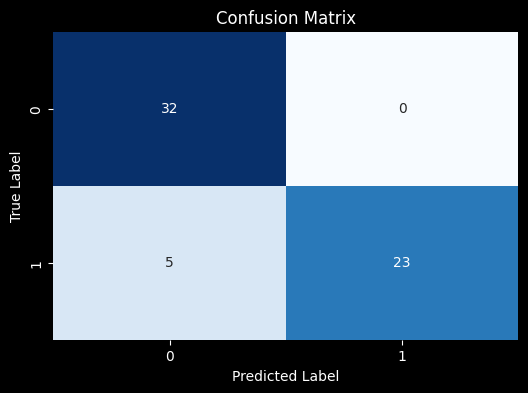

In [71]:
# Accuracy score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 8. Interpretation & Conclusion

The classification model demonstrated strong overall performance, achieving 92% accuracy on the test set. The results indicate that the model is highly effective at correctly identifying individuals without heart disease, as shown by perfect recall for the negative class. Additionally, the model achieved perfect precision for identifying individuals with heart disease, meaning there were no false positive predictions in this group.

However, the recall for the positive class was slightly lower, indicating that some cases of heart disease were missed. In medical applications, this trade-off is important to consider, as failing to detect true positive cases can have serious consequences. Despite this, the model strikes a reasonable balance between precision and recall, with high F1-scores for both classes.

Overall, the results suggest that the model is suitable for detecting heart disease, but further improvements could focus on enhancing recall for positive cases to minimize the risk of missed diagnoses.